In [2]:
#import necessary packages
import requests
import pandas as pd
from bs4 import BeautifulSoup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
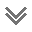

In [3]:
# create a url variable
url = 'https://www.worldometers.info/coronavirus/'

# create a requests variable
r = requests.get(url)

# make contact with website
if r.status_code == 200:
    html_doc = r.text
    
# get BeautifulSoup object
soup = BeautifulSoup(html_doc)

# print output
print(soup.prettify())

In [4]:
# Extracting the contents of the table with the table id: 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [5]:
# Now wee need to specify beautiful soup to go through the table and find everything 
# with a tr tag.
# note = th(table header), tr = (table row) and td = table column
rows = table.find_all("tr", attrs={"style": ""})
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>507,117,374</td>
 <td

In [6]:
# storage for the extracted data
output = []

column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# create a for loop statement
for cases in rows:
    cases_data = cases.find_all("td")
    if cases_data:
        # extract the text within each element
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# create output
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '507,117,374',
  'Total Deaths': '+314,429',
  'New Deaths': '6,232,808',
  'Total Recovered': '+1,010',
  'New Recovered': '459,522,579',
  'Active Cases': '+566,022',
  'Serious, Critical': '41,361,987',
  'Tot Cases/ 1M pop': '41,960',
  'Deaths/ 1M pop': '65,058',
  'Total Tests': '799.6',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '82,488,517',
  'Total Deaths': '',
  'New Deaths': '1,017,093 ',
  'Total Recovered': '',
  'New Recovered': '80,309,804',
  'Active Cases': '',
  'Serious, Critical': '1,161,620',
  'Tot Cases/ 1M pop': '1,514',
  'Deaths/ 1M pop': '246,609',
  'Total Tests': '3,041',
  'Tests/ 1M pop': '1,039,876,908',
  'Population': '3,108,838'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '43,049,974',
  'Total Deaths': '',
  'New Deaths': '522,062 ',
  'Total Recovered': '',
  'New Recovered': '42,514,479',
  'Active 

In [7]:
# create DataFrame directly from output
data = pd.DataFrame(output)

# view DataFrame
data.head()

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  507,117,374     +314,429   6,232,808   
1             1         USA   82,488,517               1,017,093    
2             2       India   43,049,974                 522,062    
3             3      Brazil   30,311,969                 662,470    
4             4      France   27,972,010                 144,614    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0          +1,010   459,522,579     +566,022        41,361,987   
1                    80,309,804                      1,161,620   
2                    42,514,479                         13,433   
3                    29,340,802                        308,697   
4                    25,618,858     +148,402         2,208,538   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            41,960         65,058       799.6                            
1             1,514        246,609       3,041  1,039,876,908  3,108,838  
2               698         30,654         372    833,377,052    593,411  
3             8,318        140,806       3,077     63,776,166    296,255  
4             1,677        426,838       2,207    266,484,045  4,066,406

In [9]:
# save DataFrame as CSV file without index
data.to_csv('cases.csv', index=False)

In [10]:
# create a JSON file
import json

# create JSON file
output_json = json.dumps(output)

# view output
output_json

'[{"Country,Other": "", "Total Cases": "World", "New Cases": "507,117,374", "Total Deaths": "+314,429", "New Deaths": "6,232,808", "Total Recovered": "+1,010", "New Recovered": "459,522,579", "Active Cases": "+566,022", "Serious, Critical": "41,361,987", "Tot Cases/ 1M pop": "41,960", "Deaths/ 1M pop": "65,058", "Total Tests": "799.6", "Tests/ 1M pop": "", "Population": ""}, {"Country,Other": "1", "Total Cases": "USA", "New Cases": "82,488,517", "Total Deaths": "", "New Deaths": "1,017,093 ", "Total Recovered": "", "New Recovered": "80,309,804", "Active Cases": "", "Serious, Critical": "1,161,620", "Tot Cases/ 1M pop": "1,514", "Deaths/ 1M pop": "246,609", "Total Tests": "3,041", "Tests/ 1M pop": "1,039,876,908", "Population": "3,108,838"}, {"Country,Other": "2", "Total Cases": "India", "New Cases": "43,049,974", "Total Deaths": "", "New Deaths": "522,062 ", "Total Recovered": "", "New Recovered": "42,514,479", "Active Cases": "", "Serious, Critical": "13,433", "Tot Cases/ 1M pop": "69

In [11]:
# save the json file to .json
with open("cases_json.json", "w") as f:
    json.dump(output, f)

In [12]:
# read json using pandas, output to .csv
pd.read_json(output_json).to_csv("cases_csv.csv", index=False)

In [15]:
# import the CSV and JSON files and view them with head() method
# import and read CSV file
data_csv = pd.read_csv("cases_csv.csv")

# view the data
print(data_csv.head())

# import and read JSON file
data_json = pd.read_json("cases_json.json")

# view the data
data_json.head()

   Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0            NaN       World  507,117,374     +314,429   6,232,808   
1            1.0         USA   82,488,517          NaN  1,017,093    
2            2.0       India   43,049,974          NaN    522,062    
3            3.0      Brazil   30,311,969          NaN    662,470    
4            4.0      France   27,972,010          NaN    144,614    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0          +1,010   459,522,579     +566,022        41,361,987   
1             NaN    80,309,804          NaN         1,161,620   
2             NaN    42,514,479          NaN            13,433   
3             NaN    29,340,802          NaN           308,697   
4             NaN    25,618,858     +148,402         2,208,538   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            41,960         65,058       799.6            NaN        NaN  
1             1,514        246,6

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  507,117,374     +314,429   6,232,808   
1             1         USA   82,488,517               1,017,093    
2             2       India   43,049,974                 522,062    
3             3      Brazil   30,311,969                 662,470    
4             4      France   27,972,010                 144,614    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0          +1,010   459,522,579     +566,022        41,361,987   
1                    80,309,804                      1,161,620   
2                    42,514,479                         13,433   
3                    29,340,802                        308,697   
4                    25,618,858     +148,402         2,208,538   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            41,960         65,058       799.6                            
1             1,514        246,609       3,041  1,039,876,908  3,108,838  
2               698         30,654         372    833,377,052    593,411  
3             8,318        140,806       3,077     63,776,166    296,255  
4             1,677        426,838       2,207    266,484,045  4,066,406

In [16]:
# view CSV and JSON DataFrames
print(data_csv.dtypes)
print(data_csv.columns)

print(data_json.dtypes)
print(data_json.columns)

Country,Other        float64
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths            object
Total Recovered       object
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/ 1M pop     object
Deaths/ 1M pop        object
Total Tests           object
Tests/ 1M pop         object
Population            object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')
Country,Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/ 1M pop    object
Deaths/ 1M pop  

In [17]:
# Create a subset consisting of the columns Country,Other, Total Cases, Total Deaths, Total Recovered, Active Cases, Serious, and Critical.
# create a subset
data_report = data_csv[['Country,Other', 'Total Cases', 'Total Deaths',
                        'Total Recovered', 'Active Cases', 'Serious, Critical']]

data_report.columns


Index(['Country,Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious, Critical'],
      dtype='object')

In [18]:
data_report.isnull().sum()

Country,Other          2
Total Cases            0
Total Deaths         173
Total Recovered      192
Active Cases         176
Serious, Critical     15
dtype: int64

In [19]:
# save DataFrame as CSV file without index
data_report.to_csv('cases_report.csv', index=False)

In [20]:
# view saved CSV
cases_report = pd.read_csv('cases_report.csv')

cases_report.head()

Country,Other Total Cases Total Deaths Total Recovered Active Cases  \
0            NaN       World     +314,429          +1,010     +566,022   
1            1.0         USA          NaN             NaN          NaN   
2            2.0       India          NaN             NaN          NaN   
3            3.0      Brazil          NaN             NaN          NaN   
4            4.0      France          NaN             NaN     +148,402   

  Serious, Critical  
0        41,361,987  
1         1,161,620  
2            13,433  
3           308,697  
4         2,208,538